In [111]:
import geopandas as gpd

import pandas as pd

In [273]:
url = './data/processed/gadm41_VNM_3.json'
districts = gpd.read_file(url, crs="EPSG:4326")


districts.to_crs(epsg=3406, inplace=True)
districts.crs





<Projected CRS: EPSG:3406>
Name: VN-2000 / UTM zone 49N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Vietnam - onshore east of 108°E.
- bounds: (108.0, 10.43, 109.53, 21.56)
Coordinate Operation:
- name: UTM zone 49N
- method: Transverse Mercator
Datum: Vietnam 2000
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [274]:
#districts = districts[districts["id"].apply(
#    lambda x: x.startswith("relation")




In [275]:
# tanthanh = phumy

In [297]:
districts.loc[:, "NAME_2"] = districts.apply(
    lambda x: "PhúMỹ" if x["NAME_1"]=="BàRịa-VũngTàu" and x["NAME_2"]=="TânThành"
    else x,
    axis=1
    )


def replace_postfix(x):
  return re.sub("\(.+?\)$","",x)

districts.loc[districts["NAME_2"]=="QuiNhơn","NAME_2"] = "QuyNhơn"
districts.loc[:, "name_normalised"] = districts.apply(
    lambda x: f'{x["NAME_1"]}, {x["NAME_2"].replace("(Thịxã)","").replace("Quận","")}, {x["NAME_3"].replace("Phường","")}'.lower(),
    axis=1
)
replace_d = {
    "hóa": "hoá",
    "hòa": "hoà",
    "bắcgiang, lụcngạn, cấmsơn(xã)": "bắcgiang, lụcngạn, cấmsơn",
    "sơnla, mộcchâu, quyhướng": "sơnla, mộcchâu, quihướng",
    "sơnla, bắcyên, phiêngcôn": "sơnla, bắcyên, phiêngkôn",
    "sơnla, maisơn, mườngchanh": "sơnla, maisơn, mươngtranh",
    "sơnla, maisơn, nàớt": "sơnla, maisơn, nàơt",
    "càmau, càmau, tânthành()": "càmau, càmau, tânthành(phường)",
    "càmau, phútân, việtkhái": "càmau, phútân, nguyễnviệtkhái",
    "lâmđồng, cáttiên, phướccát1": "lâmđồng, cáttiên, phướccát",
    "điệnbiên, thịxãmườnglay": "điệnbiên, mườnglay",
    "hànội, hoànkiếm, chươngdươngđộ": "hànội, hoànkiếm, chươngdương"
}
for k,v in replace_d.items():
    districts.loc[:,"name_normalised"] = districts.loc[:,"name_normalised"].apply(
        lambda x: x.replace(k,v)
    )

In [298]:
import re

def replace_prefix(x):
  if isinstance(x, str):
    
    x = x.replace("Thị trấn ","")
    x = x.replace("Phường ","")
    x = x.replace("Thị Trấn ","")
    x = x.replace("Huyện ","")
    x = x.replace("Thành phố ","")
    x = x.replace("Thành Phố ","")
    x = x.replace("Thị xã ","")
    x = x.replace("Thị Xã ","")
    x = x.replace("Tỉnh ","")
    x = x.replace("Quận ","")
    x = x.replace("Xã ","")
  return x
def replace_prefixADM3(x):
  if isinstance(x, str):
    x = x.replace("Xã ","")
    x = x.replace("Thị trấn ","")
    x = x.replace("Phường ","")
    x = x.replace("thị trấn ","")
  return x



In [334]:

df = pd.read_csv("./data/Processing/ds_toado_signal_final_10_11_2023.csv")

df_b = pd.read_csv("./data/processing/pop15112023.csv")
df = pd.concat([df, df_b], axis=0)
df = df.drop_duplicates(subset=["ADM1", "ADM2", "ADM3", "Pop"])


df.loc[:,"name_lower"] = df[["ADM3","Cấp"]].apply(
    lambda x: f'{x["Cấp"]} {x["ADM3"]}'.lower(),
    axis=1
)
df.loc[:, "ADM3"] = df.loc[:,"ADM3"].apply(lambda x: str(int(x)) if str(x).isdigit() else x)


In [335]:
df.loc[:,"name_normalised"] = df.apply(
    lambda x: f'{replace_prefix(x["ADM1"]).replace(" ","")}, {replace_prefix(x["ADM2"]).replace(" ","")}, {replace_prefix(x["ADM3"]).replace(" ","")}'.lower(),
    axis=1
)
g = df.groupby("name_normalised")["label"]
df.loc[g.transform(lambda x: x.count())>1,"name_normalised"] = df[g.transform(lambda x: x.count())>1].apply(
    lambda x: f'{x["name_normalised"]}({x["Cấp"].lower().replace(" ","")})',
    axis=1
)
df.loc[:,"name_normalised"] = df.loc[:,"name_normalised"].apply(
    lambda x: x.replace("hóa","hoá").replace("hòa","hoà"))
df.loc[:,"name_normalised"] = df.loc[:,"name_normalised"].apply(
    lambda x: x.replace("hóa","hoá").replace("hòa","hoà"))
df.loc[df["ADM2"]=="Thành Phố Đồng Hới","name_normalised"] = df.loc[df["ADM2"]=="Thành Phố Đồng Hới","name_normalised"].apply(
    lambda x: x.replace("quảngbình, đồnghới","quảngbình, thànhphốđồnghới")
)
df.loc[df["ADM2"]=="Thành phố Cao Lãnh","name_normalised"] = df.loc[df["ADM2"]=="Thành phố Cao Lãnh","name_normalised"].apply(
    lambda x: x.replace("đồngtháp, caolãnh","đồngtháp, caolãnh(thànhphố)")
)
df.loc[df["ADM2"]=="Thị xã Buôn Hồ","name_normalised"] = df.loc[df["ADM2"]=="Thị xã Buôn Hồ","name_normalised"].apply(
    lambda x: x.replace("đắklắk, buônhồ","đắklắk, thịxãbuônhồ")
)
df.loc[df["ADM2"]=="Thành Phố Bắc Kạn","name_normalised"] = df.loc[df["ADM2"]=="Thành Phố Bắc Kạn","name_normalised"].apply(
    lambda x: x.replace("bắckạn, bắckạn","bắckạn, thànhphốbắckạn")
)
df["name_normalised"] = df["name_normalised"].apply(
    lambda x: x.replace("kontum, iah'drai, la", "kontum, iah'drai, ia")
)
df["name_normalised"] = df["name_normalised"].apply(
    lambda x: x.replace("gialai, chưpưh, larong", "gialai, chưpưh, iarong")
)
df["name_normalised"] = df["name_normalised"].apply(
    lambda x: x.replace("gialai, chưsê, lapal", "gialai, chưsê, iapal")
)



In [336]:
df[df["name_normalised"].apply(lambda x: "gialai, chưpưh, " in x)]


,Unnamed: 0,ADM1,ADM2,ADM3,Pop,Mã,Tên Tiếng Anh,Cấp,Mã QH,Mã TP,...,lat_m,lon_m,closest_distance,x,y,level.1,label,colorCode,name_lower,name_normalised
8261,8273.0,Tỉnh Gia Lai,Huyện Chư Pưh,Nhơn Hoà,12395,23942.0,NaN,Thị trấn,639.0,64.0,...,21.15035,107.36734,NaN,419549.0,242239.0,layout4signalLv1,Rất tốt,008837,thị trấn nhơn hoà,"gialai, chưpưh, nhơnhoà"
8262,8274.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia Hrú,9436,23971.0,NaN,Xã,639.0,64.0,...,13.59994,108.14503,1568.103117,419622.0,242157.0,layout4signalLv3,Khá,FDB863,xã ia hrú,"gialai, chưpưh, iahrú"
8263,8275.0,Tỉnh Gia Lai,Huyện Chư Pưh,La Rong,6903,NaN,NaN,NaN,NaN,NaN,...,21.15035,107.36734,NaN,419593.0,242123.0,layout4signalLv2,Tốt,A6DBA0,nan la rong,"gialai, chưpưh, iarong"
8264,8276.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia Dreng,7389,23974.0,NaN,Xã,639.0,64.0,...,13.59565,108.07460,425.803388,419535.0,242150.0,layout4signalLv1,Rất tốt,008837,xã ia dreng,"gialai, chưpưh, iadreng"
8265,8277.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia Hla,5905,23978.0,Ia Hla Commune,Xã,639.0,64.0,...,13.54426,107.98180,3508.845987,419416.0,242186.0,layout4signalLv2,Tốt,A6DBA0,xã ia hla,"gialai, chưpưh, iahla"
8266,8278.0,Tỉnh Gia Lai,Huyện Chư Pưh,Chư Don,3813,23980.0,NaN,Xã,639.0,64.0,...,13.54664,108.06651,1567.374169,419546.0,242237.0,layout4signalLv1,Rất tốt,008837,xã chư don,"gialai, chưpưh, chưdon"
8267,8279.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia Phang,11044,23983.0,NaN,Xã,639.0,64.0,...,13.50286,108.16026,1573.833164,419642.0,242291.0,layout4signalLv4,Yếu,E66101,xã ia phang,"gialai, chưpưh, iaphang"
8268,8280.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia Le,13072,23986.0,NaN,Xã,639.0,64.0,...,13.44337,108.00464,7188.698488,419533.0,242383.0,layout4signalLv2,Tốt,A6DBA0,xã ia le,"gialai, chưpưh, iale"
8269,8281.0,Tỉnh Gia Lai,Huyện Chư Pưh,Ia BLứ,7554,23987.0,Ia BLu commune,Xã,639.0,64.0,...,13.94362,108.60422,1545.791831,420310.0,241654.0,layout4signalLv1,Rất tốt,008837,xã ia blứ,"gialai, chưpưh, iablứ"


In [337]:
df = df[["ADM1", "ADM2", "ADM3", "Pop", "name_normalised", "x", "y", "level.1","label","colorCode"]]
success_merged = districts.merge(df, on=["name_normalised"], how="inner")
success_merged["name_normalised"]

0                    angiang, anphú, anphú
1                  angiang, anphú, đaphước
2                  angiang, anphú, khánhan
3                angiang, anphú, khánhbình
4                 angiang, anphú, longbình
                       ...                
11151             yênbái, yênbình, xuânlai
11152            yênbái, yênbình, xuânlong
11153    yênbái, yênbình, yênbình(thịtrấn)
11154         yênbái, yênbình, yênbình(xã)
11155            yênbái, yênbình, yênthành
Name: name_normalised, Length: 11156, dtype: object

In [328]:

districts[~districts["GID_3"].isin(success_merged["GID_3"])].groupby("NAME_1").count()

,GID_3,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,name_normalised
NAME_1,,,,,,,,,,,,,,,,,
BạcLiêu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BắcGiang,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
KiênGiang,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LaiChâu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LàoCai,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
NamĐịnh,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PhúYên,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
QuảngNinh,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SơnLa,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [322]:
districts[~districts["GID_3"].isin(success_merged["GID_3"]) & (districts["NAME_1"]=="ĐồngTháp")]

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,name_normalised
2441,VNM.18.2.11_1,VNM,Vietnam,VNM.18_1,ĐồngTháp,NA,VNM.18.2_1,CaoLãnh,NA,MỹThọ(Xã),MyTho,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((-77912.972 1159547.009, -79254...","đồngtháp, caolãnh, mỹthọ(xã)"
2566,VNM.18.12.5_1,VNM,Vietnam,VNM.18_1,ĐồngTháp,NA,VNM.18.12_1,ThápMười,NA,MỹAn(Xã),MyAn,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((-61092.134 1168705.782, -59745...","đồngtháp, thápmười, mỹan(xã)"


In [387]:
success_merged[["level.1","label","signal_level"]]

,level.1,label,signal_level
0,layout4signalLv1,Rất tốt,4
1,layout4signalLv1,Rất tốt,4
2,layout4signalLv1,Rất tốt,4
3,layout4signalLv2,Tốt,3
4,layout4signalLv1,Rất tốt,4
...,...,...,...
11151,layout4signalLv3,Khá,2
11152,signalLv0,Không có thông tin,0
11153,layout4signalLv2,Tốt,3
11154,layout4signalLv1,Rất tốt,4


<Axes: >

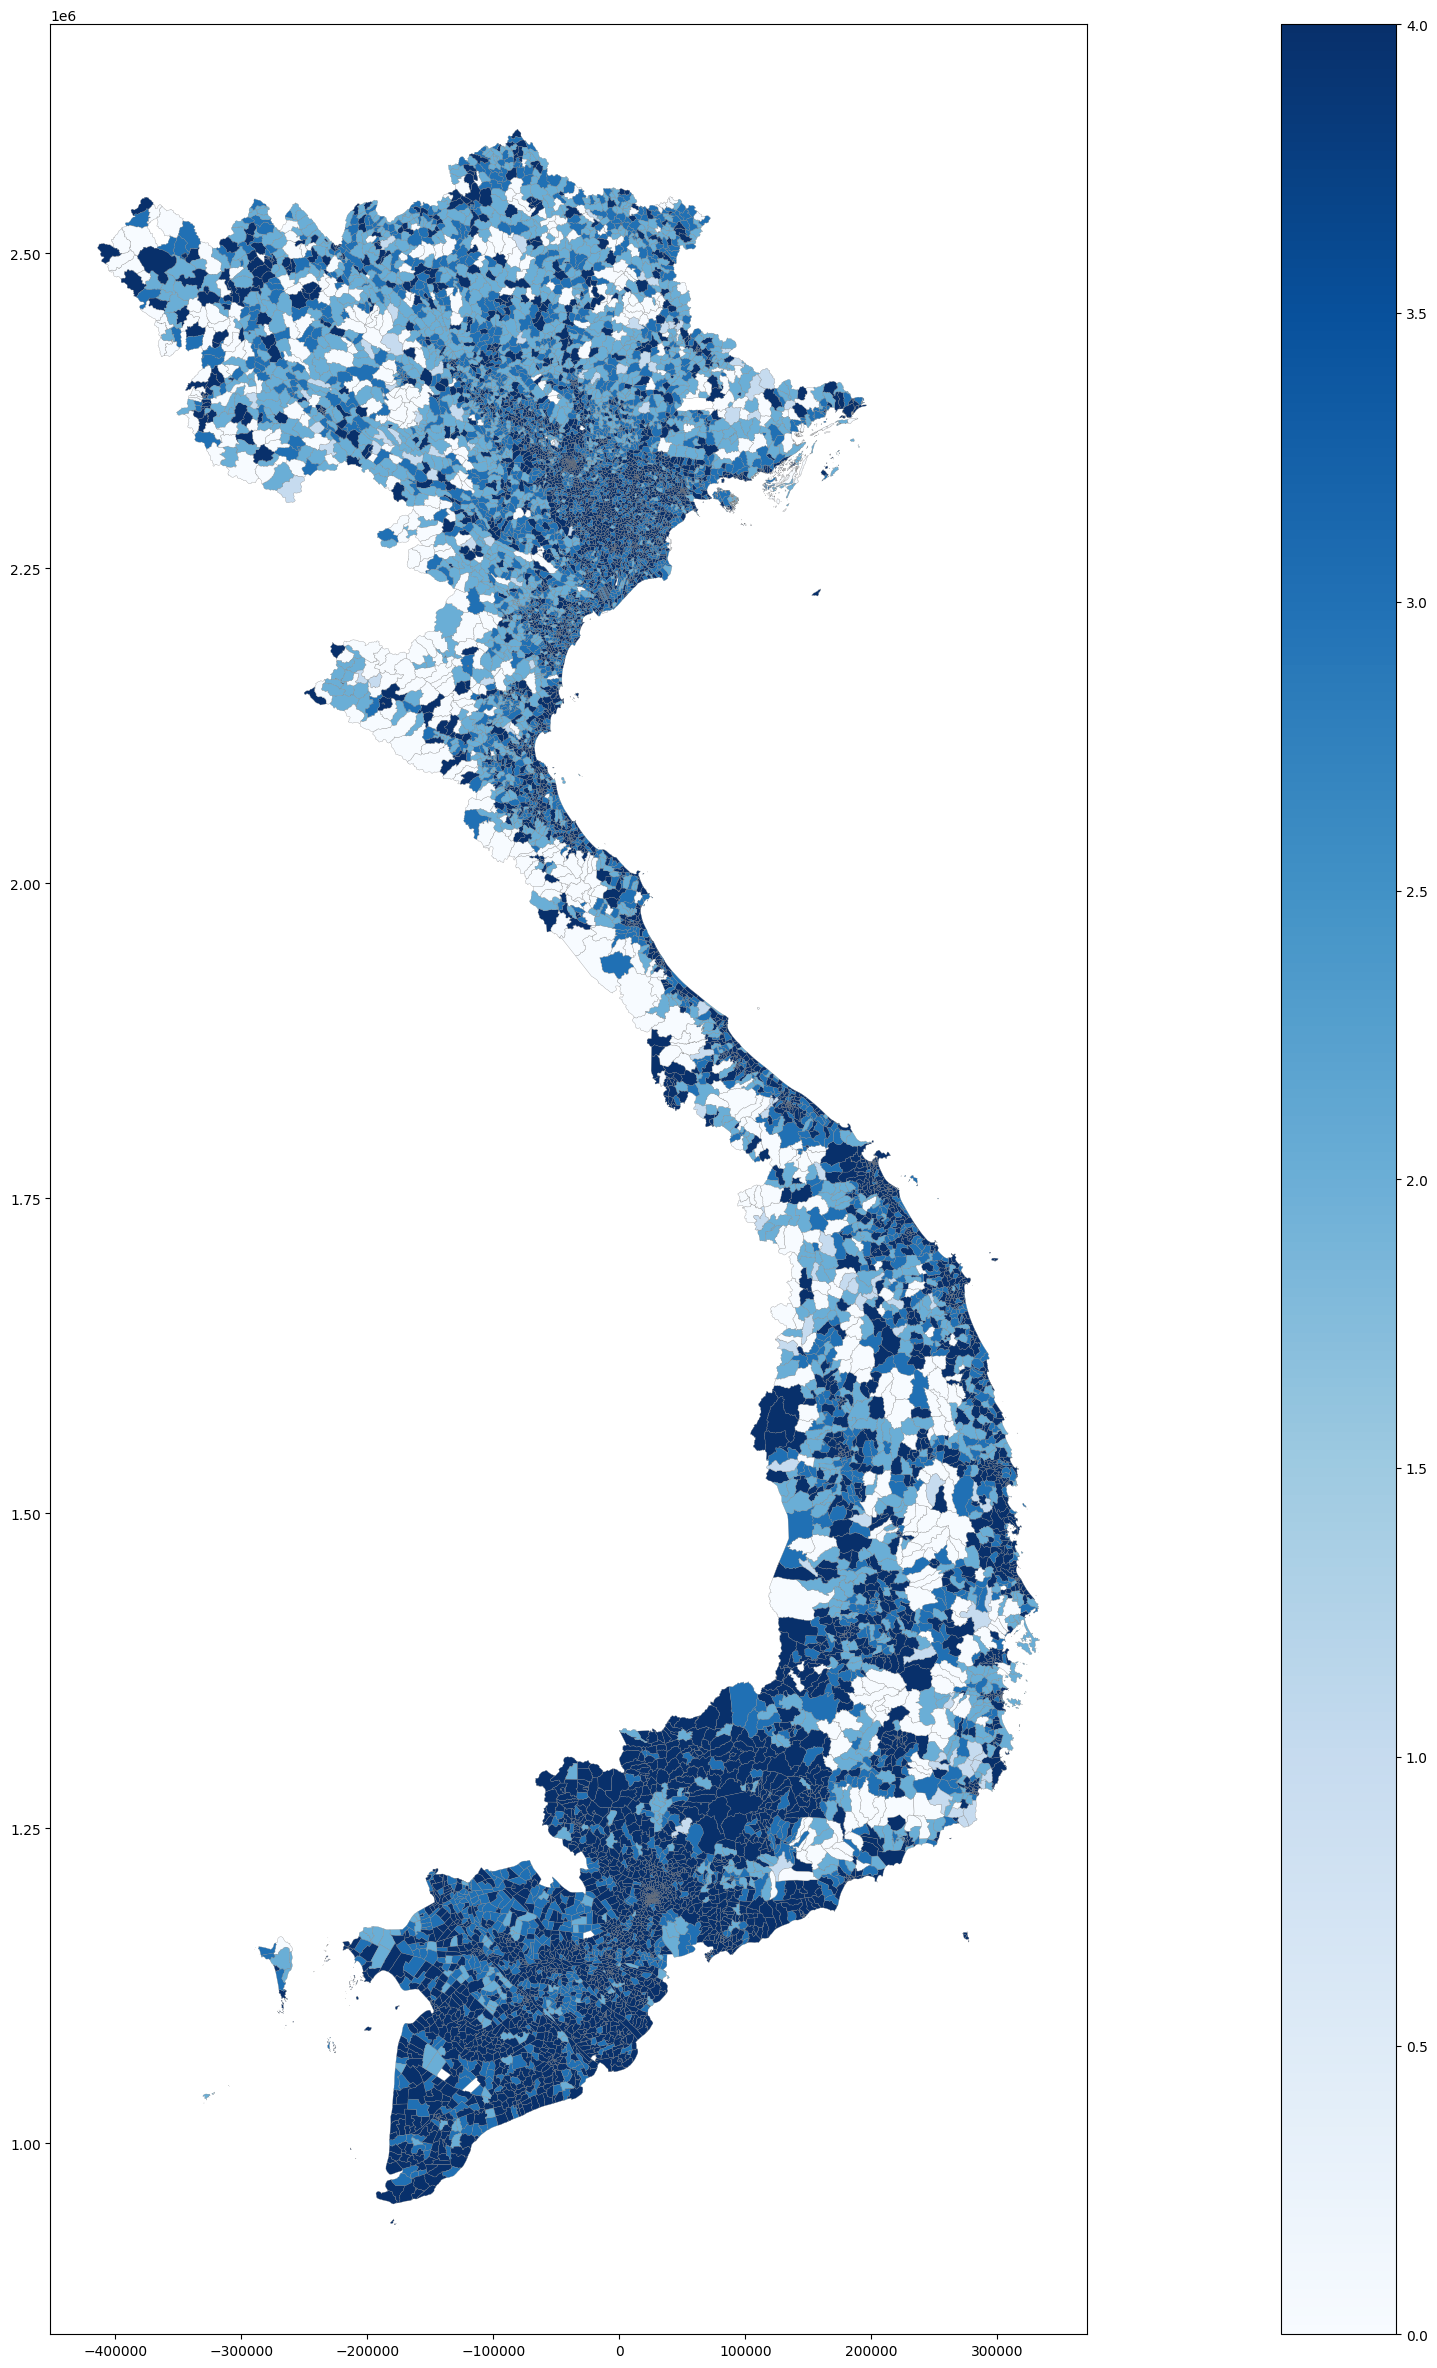

In [386]:
success_merged.loc[:, "signal_level"] = success_merged["level.1"].apply(
    lambda x: 5 - int(x[-1]) if x[-1] != '0' else 0)

success_merged.loc[:, "density"] = success_merged["Pop"]/success_merged.area
success_merged.plot(cmap='Blues',linewidth=0.2, 
    edgecolor='gray',column='signal_level',
    legend=True,figsize=(50, 30),
    #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
   )



In [374]:
success_merged.signal_level

0       -1
1       -1
2       -1
3       -2
4       -1
        ..
11151   -3
11152    0
11153   -2
11154   -1
11155   -3
Name: signal_level, Length: 11156, dtype: int64

In [ ]:
!pip install mapclassify

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,...,ADM1,ADM2,ADM3,Pop,x,y,level.1,label,colorCode,density
4515,VNM.25.1.1_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,AnPhúTây,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã An Phú Tây,21152,NaN,NaN,NaN,NaN,NaN,0.003520
4516,VNM.25.1.2_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,BìnhChánh,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Bình Chánh,27698,NaN,NaN,NaN,NaN,NaN,0.003403
4517,VNM.25.1.3_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,BìnhHưng,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Bình Hưng,87001,NaN,NaN,NaN,NaN,NaN,0.006287
4518,VNM.25.1.4_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,BìnhLợi,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Bình Lợi,12328,NaN,NaN,NaN,NaN,NaN,0.000629
4519,VNM.25.1.5_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,ĐaPhước,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Đa Phước,24643,NaN,NaN,NaN,NaN,NaN,0.001521
4520,VNM.25.1.6_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,HưngLong,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Hưng Long,25677,NaN,NaN,NaN,NaN,NaN,0.001940
4521,VNM.25.1.7_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,LêMinhXuân,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Lê Minh Xuân,40704,NaN,NaN,NaN,NaN,NaN,0.001147
4522,VNM.25.1.8_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,PhạmVănHai,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Phạm Văn Hai,33435,NaN,NaN,NaN,NaN,NaN,0.001229
4523,VNM.25.1.9_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,PhongPhú,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Phong Phú,37058,NaN,NaN,NaN,NaN,NaN,0.001999
4524,VNM.25.1.10_1,VNM,Vietnam,VNM.25_1,HồChíMinh,NA,VNM.25.1_1,BìnhChánh,NA,QuyĐức,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,Xã Quy Đức,14186,NaN,NaN,NaN,NaN,NaN,0.002228


In [ ]:
m.loc[:, "signal_level"] = m["level.1"].apply(
    lambda x: -int(x[-1]) if x[-1] != 0 else -5
)

In [ ]:
m["level.1"].unique()

array(['layout4signalLv2', 'layout4signalLv1', 'layout4signalLv3',
       'signalLv0', 'layout4signalLv4'], dtype=object)

In [ ]:
m.loc[:, "density"] = m["Pop"]/m.area

<Axes: >

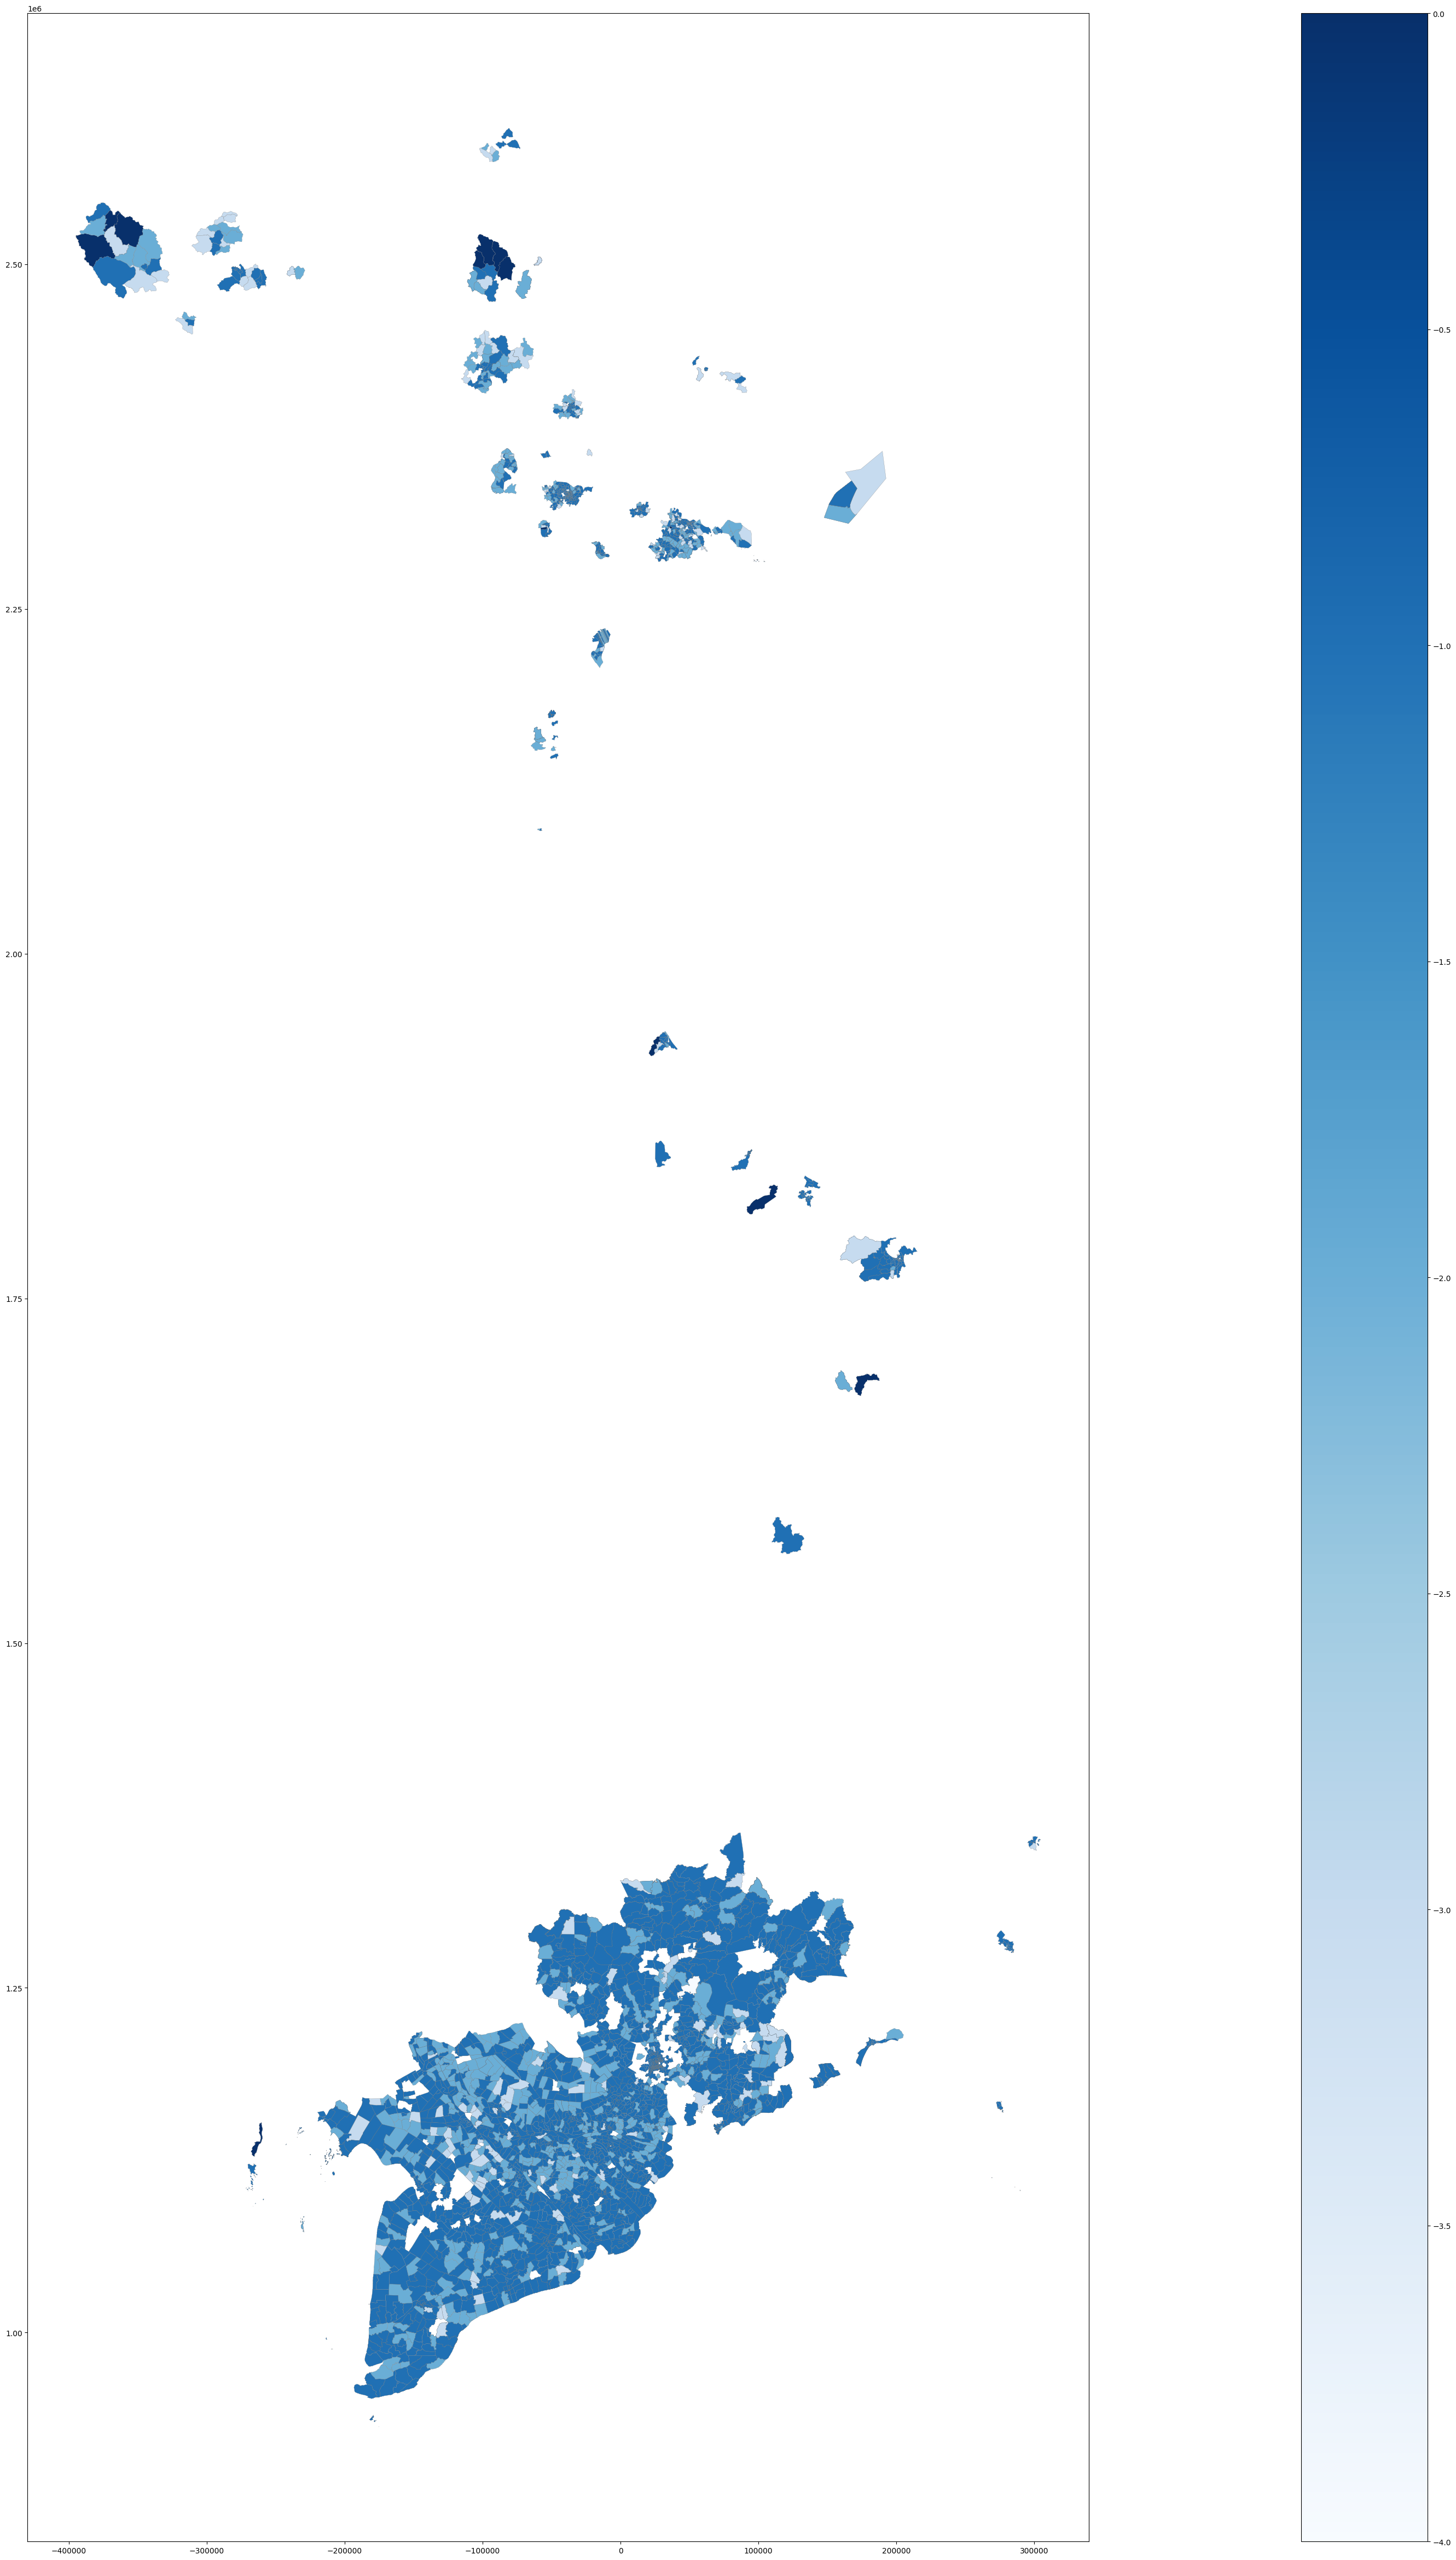

In [ ]:
m.plot(cmap='Blues',linewidth=0.2,# scheme='quantiles',
    edgecolor='gray',column='signal_level',
    legend=True,figsize=(100, 60),
    #legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
   )

In [358]:
tmp = success_merged[pd.isna(success_merged["label"])].to_crs("4326")
tmp["centroid"] = tmp.centroid
tmp[["ADM1", "ADM2", "ADM3", "name_normalised","centroid"]].to_csv("./data/Processing/for_signals.csv", index=None)

F:\tmp\ipykernel_1896\2603118782.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tmp["centroid"] = tmp.centroid


In [368]:
df_n = pd.read_csv("./data/Processing/a_s.csv")
success_merged.loc[pd.isna(success_merged["label"]),["x","y","level.1","label","colorCode"]] = df_n[["x","y","level","label","colorCode"]].values

In [388]:
success_merged.to_crs("4326").to_file("./data/Processed/ADM_3_pop_signals1.geojson", driver='GeoJSON')

In [376]:
success_merged.columns

Index(['GID_3', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2',
       'NAME_2', 'NL_NAME_2', 'NAME_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3',
       'ENGTYPE_3', 'CC_3', 'HASC_3', 'geometry', 'name_normalised', 'ADM1',
       'ADM2', 'ADM3', 'Pop', 'x', 'y', 'level.1', 'label', 'colorCode',
       'density', 'signal_level'],
      dtype='object')